In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('d:/plikiPython/JUPYTER/survey_results_public.csv')
schema = pd.read_csv('d:/plikiPython/JUPYTER/survey_results_schema.csv')

View at data and clean:

In [2]:
print('\n df.head: \n', df.head() ) 
print('\n df.tail: \n',df.tail(5))
print ('\n df.shape: \n', df.shape)
print('\n df.columns: \n', list (df.columns), '\n \n amount of columns: ', len( list(df.columns) ), '\n' )

df1 = df.iloc[:,-5:] 
print('\n last 5 coumns with aswers : \n',df1.head())

df = df.drop(['ResponseId','ConvertedCompYearly'], axis =1)


 df.head: 
    ResponseId                                         MainBranch  \
0           1                     I am a developer by profession   
1           2             I am a student who is learning to code   
2           3  I am not primarily a developer, but I write co...   
3           4                     I am a developer by profession   
4           5                     I am a developer by profession   

                                          Employment  \
0  Independent contractor, freelancer, or self-em...   
1                                 Student, full-time   
2                                 Student, full-time   
3                                 Employed full-time   
4  Independent contractor, freelancer, or self-em...   

                                             Country US_State UK_Country  \
0                                           Slovakia      NaN        NaN   
1                                        Netherlands      NaN        NaN   
2            

Questions to be answerd:

1) Is file with results of survey uderstandable ? 
2) To which questions we have less answers and to which we have more ?
3) Who mostly/always avoid answering ?
4) Who mostly/always answered  ?
5) Does your opinion about survey lenght influents amount of NaNs  ?

#### Answers

1) Is file with results of survey uderstandable ? 

In [3]:
def get_description(value_name, template):
    '''
    INPUT - template - pandas dataframe with the schema of the developers survey
            value_name - string - value for which you would like to know about description
    OUTPUT - 
            desc - string - the description of the value_name
    '''
    
    if value_name in template['qname'].values.tolist():
        desc = list(template[template['qname'] == value_name]['question'])[0]
    else :
        desc = np.nan #'NOT IN QUESTION LIST'  

    return desc


#check if all colums in aswer file are possible to be described:
column_names = pd.DataFrame( df.columns.values.tolist(), columns = ['col_name'] ) # data frame of column names with description
# print('\n answer column names: \n', column_names, column_names.shape)

descrips = pd.DataFrame(get_description(col,schema) for col in column_names['col_name']) #descriptions of column names 
# print("\n \n answer column desription : \n \n", descrips)

# horizontal_stack = pd.concat([survey_sub, survey_sub_last10], axis=1)
column_names_desc = pd.concat([column_names,descrips],axis=1)  # data frame of column names with description
columnNames = ['qname','question']
column_names_desc.columns=columnNames

# print('\n \ncolumn_names_desc  :\n',column_names_desc )

print('\n PERCENTAGE OF COLUMNS WITHOUT DESCRIPTION: ', "%.2f" % column_names_desc['question'].isnull().mean())  # percentage of columns without description
print('\n list of columns without description:: \n', column_names[column_names_desc.isna().any(axis=1)])

# to add column descritption if missing
column_names_desc.loc[column_names_desc['qname'] == 'LanguageHaveWorkedWith', 'question'] = 'Language you have worked with'
column_names_desc.loc[column_names_desc['qname'] == 'LanguageWantToWorkWith', 'question'] = 'Language you want to work with'
column_names_desc.loc[column_names_desc['qname'] == 'DatabaseHaveWorkedWith', 'question'] = 'Database you have worked with'
column_names_desc.loc[column_names_desc['qname'] == 'DatabaseWantToWorkWith', 'question'] = 'Database you want to work with'
column_names_desc.loc[column_names_desc['qname'] == 'PlatformHaveWorkedWith', 'question'] = 'Cloud platforms you have worked with'
column_names_desc.loc[column_names_desc['qname'] == 'PlatformWantToWorkWith', 'question'] = 'Cloud platforms you want to work with'
column_names_desc.loc[column_names_desc['qname'] == 'WebframeHaveWorkedWith', 'question'] = 'Web frameworks you have worked with'
column_names_desc.loc[column_names_desc['qname'] == 'WebframeWantToWorkWith', 'question'] = 'Web frameworks you want to work with'
column_names_desc.loc[column_names_desc['qname'] == 'MiscTechHaveWorkedWith', 'question'] = 'Frameworks and libraries you have done extensive development'
column_names_desc.loc[column_names_desc['qname'] == 'MiscTechWantToWorkWith', 'question'] = 'Frameworks and libraries you wnant to work with'
column_names_desc.loc[column_names_desc['qname'] == 'ToolsTechHaveWorkedWith', 'question'] = 'Tools you have done extensive development work'
column_names_desc.loc[column_names_desc['qname'] == 'ToolsTechWantToWorkWith', 'question'] = 'Tools you wnant to work with'
column_names_desc.loc[column_names_desc['qname'] == 'NEWCollabToolsHaveWorkedWith', 'question'] = 'Development environments which did you use regularly over the past year'
column_names_desc.loc[column_names_desc['qname'] == 'NEWCollabToolsWantToWorkWith', 'question'] = 'Development environments which you want to use next year'
column_names_desc.loc[column_names_desc['qname'] == 'ConvertedCompYearly', 'question'] = 'Converted year'

# print(column_names_desc.head())


 PERCENTAGE OF COLUMNS WITHOUT DESCRIPTION:  0.30

 list of columns without description:: 
                         col_name
15        LanguageHaveWorkedWith
16        LanguageWantToWorkWith
17        DatabaseHaveWorkedWith
18        DatabaseWantToWorkWith
19        PlatformHaveWorkedWith
20        PlatformWantToWorkWith
21        WebframeHaveWorkedWith
22        WebframeWantToWorkWith
23        MiscTechHaveWorkedWith
24        MiscTechWantToWorkWith
25       ToolsTechHaveWorkedWith
26       ToolsTechWantToWorkWith
27  NEWCollabToolsHaveWorkedWith
28  NEWCollabToolsWantToWorkWith


2) To which questions we have less answers and to which we have more ?


 MISSING VALUES IN COLUMNS: 


 COLUMNS WITH TOP MISSING VALUES: 

                    qname  perc of NaNs  \
0              UK_Country      0.947051   
1                US_State      0.821187   
2  MiscTechWantToWorkWith      0.544326   
3  PlatformWantToWorkWith      0.501204   
4  MiscTechHaveWorkedWith      0.436055   
5               CompTotal      0.434521   
6  WebframeWantToWorkWith      0.375652   
7  PlatformHaveWorkedWith      0.375172   
8                CompFreq      0.374993   
9  DatabaseWantToWorkWith      0.301298   

                                            question  
0  In which part of the United Kingdom do you liv...  
1  <p>In which state or territory of the USA do y...  
2    Frameworks and libraries you wnant to work with  
3              Cloud platforms you want to work with  
4  Frameworks and libraries you have done extensi...  
5  What is your current total compensation (salar...  
6               Web frameworks you want to work with  
7               Cl

C:\Users\krz-w\AppData\Local\Temp\ipykernel_20620\291996194.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1%}'.format(x) for x in current_values])


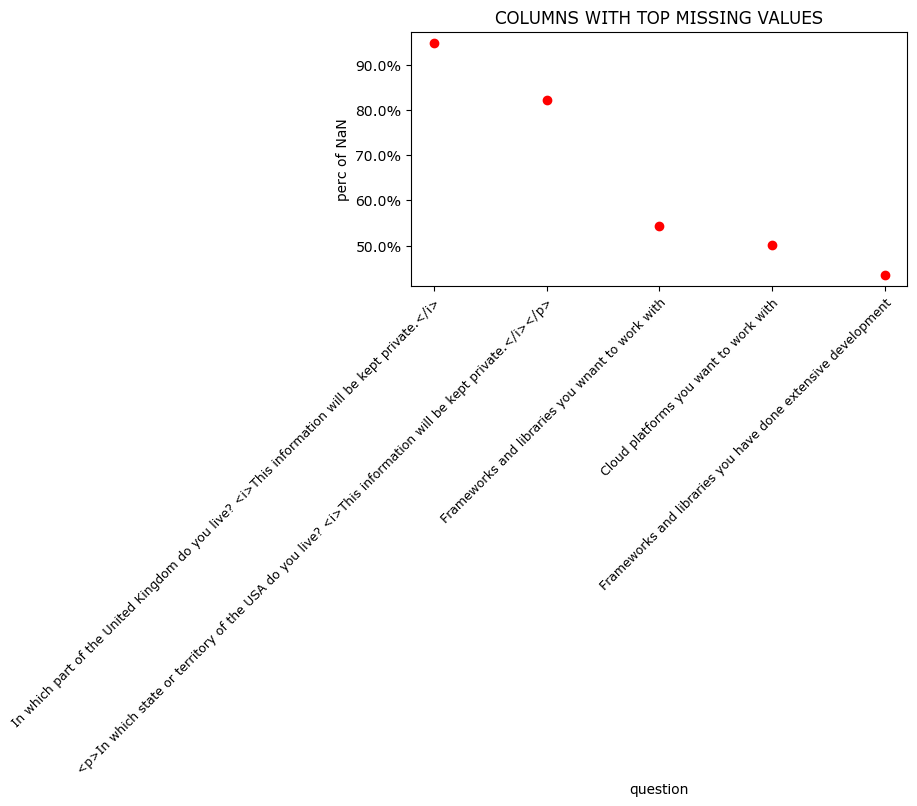

C:\Users\krz-w\AppData\Local\Temp\ipykernel_20620\291996194.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.2%}'.format(x) for x in current_values])


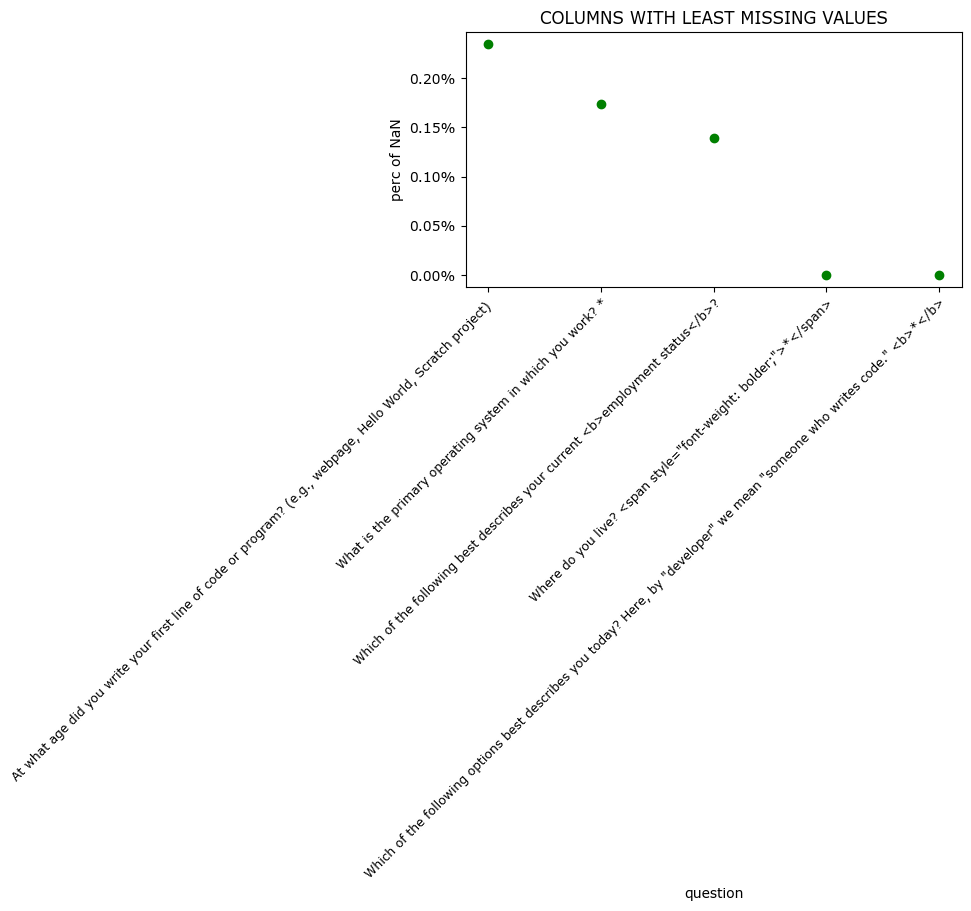

In [4]:
# The proportion of missing values in columns
NaN_perc = pd.DataFrame(df.isnull().mean().sort_values(ascending=False))
NaN_perc.reset_index(inplace=True)
columnNames1 = ['qname','value']
NaN_perc.columns=columnNames1

descrips1 = pd.DataFrame(get_description(col,column_names_desc) for col in NaN_perc['qname']) #descriptions of column names 

NaN_perc_desc = pd.concat([NaN_perc,descrips1],axis=1)  # data frame of column names with description
columnNames2 = ['qname','perc of NaNs','question']
NaN_perc_desc.columns = columnNames2
# print('\n percentage of mising answers in each column: \n', NaN_perc_desc)

print('\n MISSING VALUES IN COLUMNS: \n' ) 

print('\n COLUMNS WITH TOP MISSING VALUES: \n' ) 
print(NaN_perc_desc.head(10))

print('\n COLUMNS WITH LEAST MISSING VALUES: \n' ) 
print(NaN_perc_desc.tail(10))

plt.title('COLUMNS WITH TOP MISSING VALUES')
plt.xlabel('question')
plt.xticks(rotation=45, ha='right',fontsize = 9,wrap=True )
plt.ylabel('perc of NaN')
plt.plot(NaN_perc_desc['question'][:5],NaN_perc_desc['perc of NaNs'][:5],'ro')
current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.2f}'.format(x) for x in current_values])
plt.gca().set_yticklabels(['{:,.1%}'.format(x) for x in current_values])
plt.subplots_adjust(bottom=0.35)
plt.show()

plt.title('COLUMNS WITH LEAST MISSING VALUES')
plt.xlabel('question')
plt.xticks(rotation=45, ha='right',fontsize = 9,wrap=True )
plt.ylabel('perc of NaN')
plt.plot(NaN_perc_desc['question'][-5:],NaN_perc_desc['perc of NaNs'][-5:],'go')
current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.3f}'.format(x) for x in current_values])
plt.gca().set_yticklabels(['{:,.2%}'.format(x) for x in current_values])
plt.subplots_adjust(bottom=0.35)
plt.show()


3. Who mostly/always avoid answering?
4. Who mostly/always answered?


 PERCENTAGE OF ANSWERS MISSED, GROUPED BY PROFFESION :
                                                     NaNs_count  perc_of_NaN
proffesion                                                                 
None of these                                             8516     0.564647
I code primarily as a hobby                              67446     0.423422
I am a student who is learning to code                  159816     0.406121
I used to be a developer by profession, but no ...       13931     0.324195
I am not primarily a developer, but I write cod...       52851     0.211627
I am a developer by profession                          350817     0.150940


C:\Users\krz-w\AppData\Local\Temp\ipykernel_20620\4064282055.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1%}'.format(x) for x in current_values])


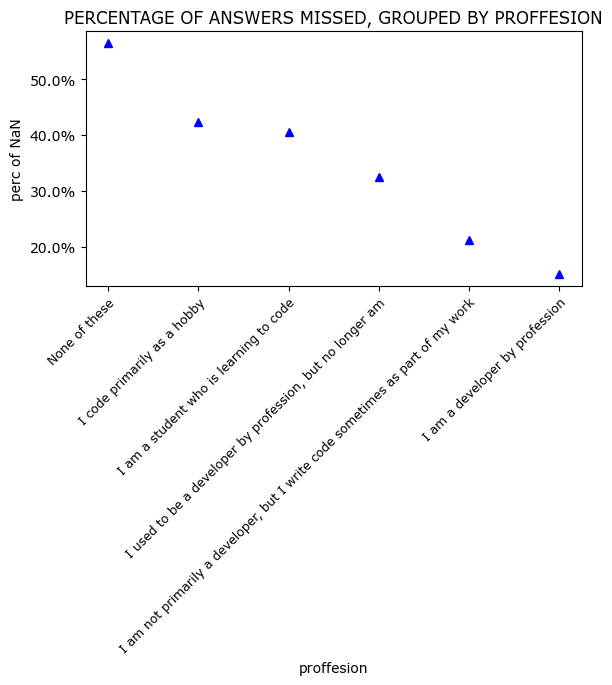

In [5]:
#how many NaN and not_NaN in rows of aswer data frame:
nan_in_row = df.isnull().sum(axis=1)
not_nan_in_row = df.notna().sum(axis=1)

prof_nans = pd.concat([df['MainBranch'],nan_in_row,not_nan_in_row],axis=1) # data frame of proffesions and NaN/not_NaN in rows
columnNames3 = ['proffesion','NaNs_count','not_NaNs_count']
prof_nans.columns=columnNames3

prof_nans_df = pd.DataFrame( prof_nans.groupby('proffesion').sum()['NaNs_count'] ) # percentage of aswers missed gouped by proffesion:

for i in range (prof_nans.groupby('proffesion').sum()['NaNs_count'].shape[0]):  # calculate percetage for each row
    prof_nans_df.loc[prof_nans_df.index[i],'perc_of_NaN'] = (prof_nans.groupby('proffesion').sum()['NaNs_count'][i] / prof_nans.groupby('proffesion').sum()['not_NaNs_count'][i])

print('\n PERCENTAGE OF ANSWERS MISSED, GROUPED BY PROFFESION :\n',prof_nans_df.sort_values(by='perc_of_NaN', ascending=False))

prof_nans_df.reset_index(inplace=True)

plt.title('PERCENTAGE OF ANSWERS MISSED, GROUPED BY PROFFESION')
plt.xlabel('proffesion')
plt.xticks(rotation=45, ha='right',fontsize = 9,wrap=True ) 
plt.ylabel('perc of NaN')
plt.plot(prof_nans_df.sort_values(by='perc_of_NaN', ascending=False)['proffesion'],prof_nans_df.sort_values(by='perc_of_NaN', ascending=False)['perc_of_NaN'],'b^')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.1%}'.format(x) for x in current_values])
plt.subplots_adjust(bottom=0.35)

plt.show()

5. Does your opinion about survey influents amount of NaNs?


 PERCENTAGE OF ANSWERS MISSED, GROUPED BY OPINION ABOUT SURVEY :
                        NaNs_count  perc_of_NaN
SurveyLength                                  
Too long                   115443     0.237264
Too short                   30645     0.193448
Appropriate in length      480080     0.192992
            SurveyLength  NaNs_count  perc_of_NaN
0  Appropriate in length      480080     0.192992
1               Too long      115443     0.237264
2              Too short       30645     0.193448


C:\Users\krz-w\AppData\Local\Temp\ipykernel_20620\426358256.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1%}'.format(x) for x in current_values])


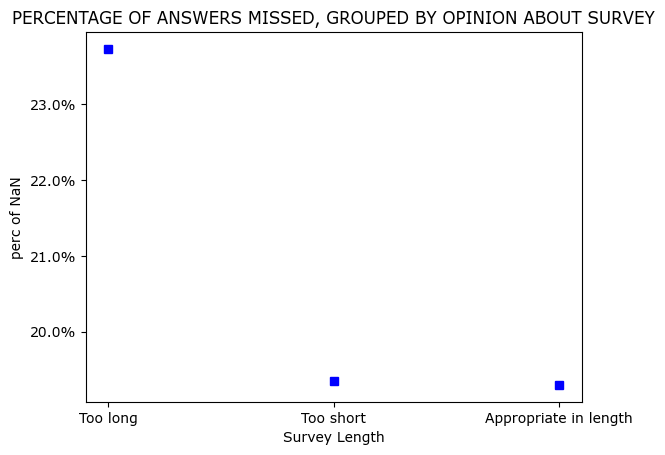

In [6]:

surv_opinion = pd.concat([df['SurveyLength'],nan_in_row,not_nan_in_row],axis=1) # data frame of proffesions and opinions about survey
columnNames4 = ['SurveyLength','NaNs_count','not_NaNs_count']
surv_opinion.columns=columnNames4

surv_opinion_df = pd.DataFrame( surv_opinion.groupby('SurveyLength').sum()['NaNs_count'] ) # percentage of aswers missed grouped by opinions about survey

for i in range (surv_opinion.groupby('SurveyLength').sum()['NaNs_count'].shape[0]):  # calculate percetage for each row
    surv_opinion_df.loc[surv_opinion_df.index[i],'perc_of_NaN'] = (surv_opinion.groupby('SurveyLength').sum()['NaNs_count'][i] / surv_opinion.groupby('SurveyLength').sum()['not_NaNs_count'][i])

print('\n PERCENTAGE OF ANSWERS MISSED, GROUPED BY OPINION ABOUT SURVEY :\n', surv_opinion_df.sort_values(by='perc_of_NaN', ascending=False))

surv_opinion_df.reset_index(inplace=True)
print(surv_opinion_df)


plt.title('PERCENTAGE OF ANSWERS MISSED, GROUPED BY OPINION ABOUT SURVEY')
plt.xlabel('Survey Length')
plt.ylabel('perc of NaN')
plt.plot(surv_opinion_df.sort_values(by='perc_of_NaN', ascending=False)['SurveyLength'],surv_opinion_df.sort_values(by='perc_of_NaN', ascending=False)['perc_of_NaN'],'bs')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.1%}'.format(x) for x in current_values])

plt.show()